In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


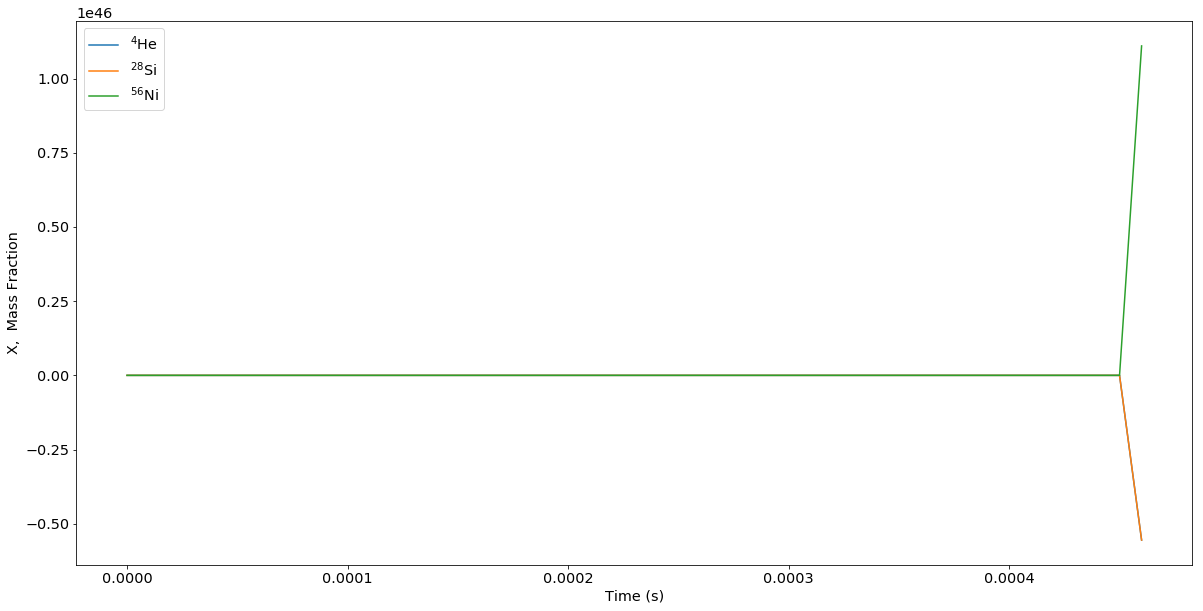

In [18]:
a = 1e-2
b = 1e18
c = 1e6



tstop = 10000

tarray = np.zeros(tstop)
y1 = np.zeros(tstop)
y2 = np.zeros(tstop)
y3 = np.zeros(tstop)

dt = 1e-5

y1[0] = 0
y2[0] = 1./28.
y3[0] = 0

y = np.array([y1,y2,y3])
for i in range(1,tstop):
    tarray[i] = i*dt
    fnew = np.array([7*a*y[1,i-1]-7*b*y[1,i-1]*y[0,i-1]**7+7*c*y[2,i-1],-a*y[1,i-1]-b*y[1,i-1]*y[0,i-1]**7+c*y[2,i-1],b*y[1,i-1]*y[0,i-1]**7-c*y[2,i-1]])  
    y[:,i] = y[:,i-1] + dt*fnew
   
plt.ylabel('X,  Mass Fraction')
plt.xlabel('Time (s)')
plt.plot(tarray,4*y[0,:],label = r'$^4$He')
plt.plot(tarray,28*y[1,:], label = r'$^{28}$Si')
plt.plot(tarray, 56*y[2,:], label = r'$^{56}$Ni')
plt.legend(loc = 'best')

<Figure size 1440x720 with 0 Axes>

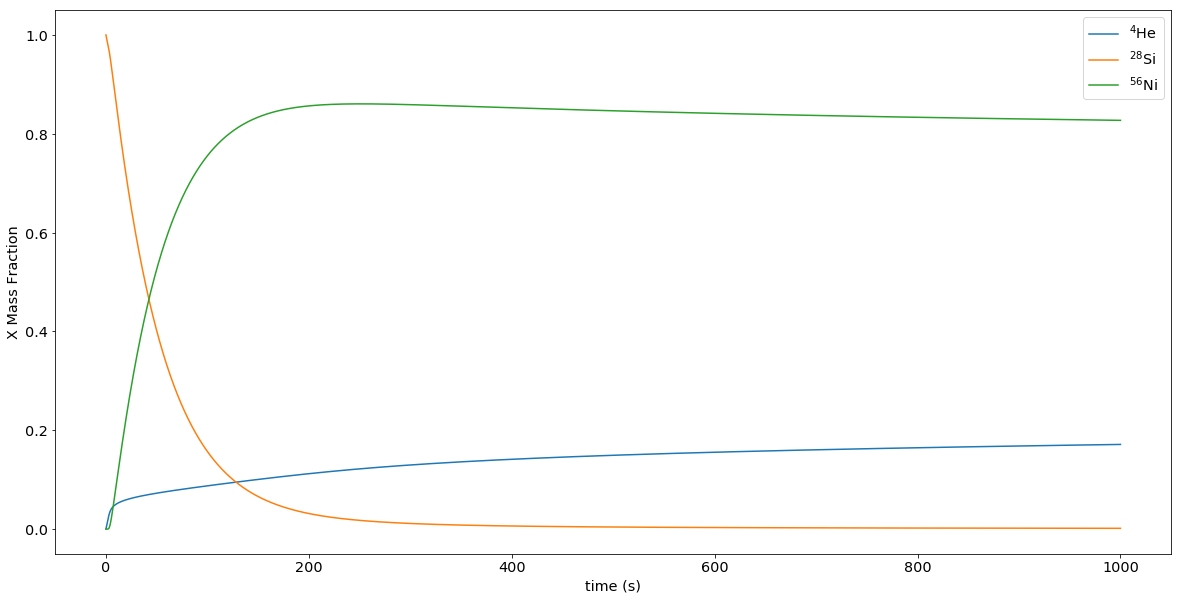

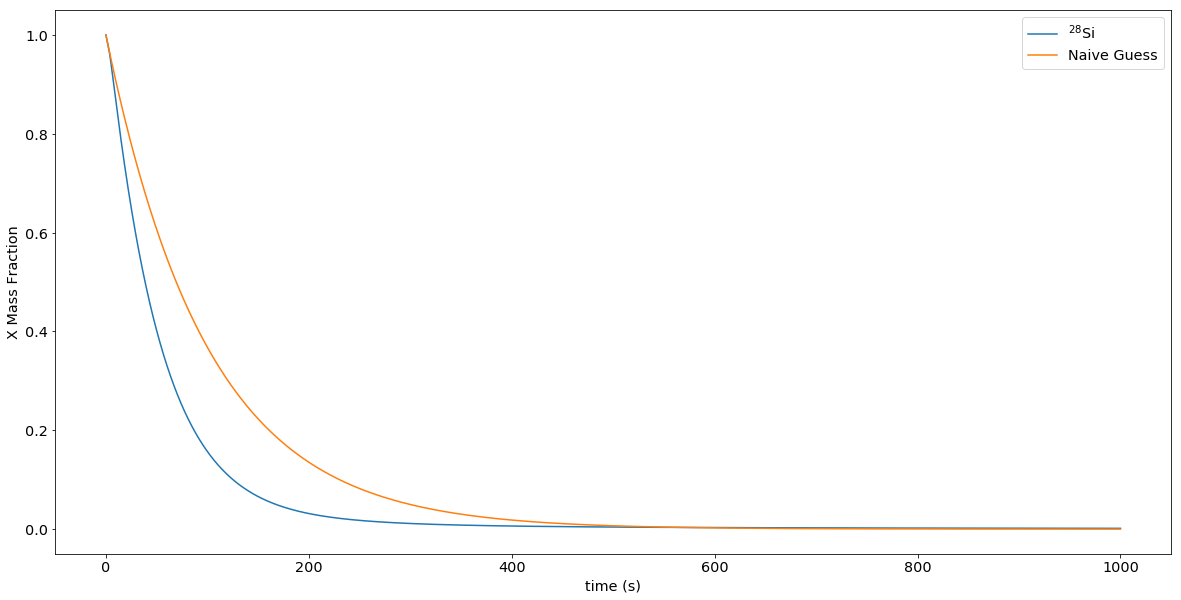

In [16]:
a = 1e-2
b = 1e18
c = 1e6

# number of steps
tstop = 1000000

tarray = np.zeros(tstop)
y1 = np.zeros(tstop)
y2 = np.zeros(tstop)
y3 = np.zeros(tstop)

#step size
dt = 1e-3

#initial conditions
y1[0] = 0
y2[0] = 1./28.
y3[0] = 0

plt.figure(figsize=(20,10))

y = np.array([y1,y2,y3])

for i in range(1,tstop):
    
    #Set our initial guess to be the composition at the previous time step
    y[:,i] = y[:,i-1]
    dx = [1,1,1]
    j = 0
    
    tarray[i] = i*dt
    
    while(j<1):
        j = j+1
        dxold = dx
        fnew = np.array([7*a*y[1,i]-7*b*y[1,i]*y[0,i]**7+7*c*y[2,i],-a*y[1,i]-b*y[1,i]*y[0,i]**7+c*y[2,i],b*y[1,i]*y[0,i]**7-c*y[2,i]])  
        dx = np.linalg.inv(1/dt*np.identity(3) - [[-49*b*y[1,i]*y[0,i]**6,7*a-7*b*y[0,i]**7,7*c],[-7*b*y[1,i]*y[0,i]**6,a-b*y[0,i]**7,c],[7*b*y[1,i]*y[0,i]**6,b*y[0,i]**7,-c]])
        dx = np.matmul(dx,fnew)
        y[:,i] = y[:,i] + dx
plt.figure(figsize=(20,10))
plt.ylabel('X Mass Fraction')
plt.xlabel('time (s)')
plt.plot(tarray,4*y[0,:],label = r'$^4$He')
plt.plot(tarray,28*y[1,:], label = r'$^{28}$Si')
plt.plot(tarray, 56*y[2,:], label = r'$^{56}$Ni')
plt.legend(loc = 'best')
plt.figure(figsize=(20,10))
plt.ylabel('X Mass Fraction')
plt.xlabel('time (s)')
plt.plot(tarray,28*y[1,:], label = r'$^{28}$Si')
plt.plot(tarray, np.exp(-a*tarray), label = 'Naive Guess')
plt.legend(loc = 'best')